# PART B : Regression

In [14]:
import pandas as pd
df = pd.read_csv('diamonds.csv')
print(df) 

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [15]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [17]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Output of df.describe() has some attributes (cut,color,clarity) missing. This is because those attributes are of object data type (We can see that from df.info()). describe() method only returns if the attribute contains numerical data.

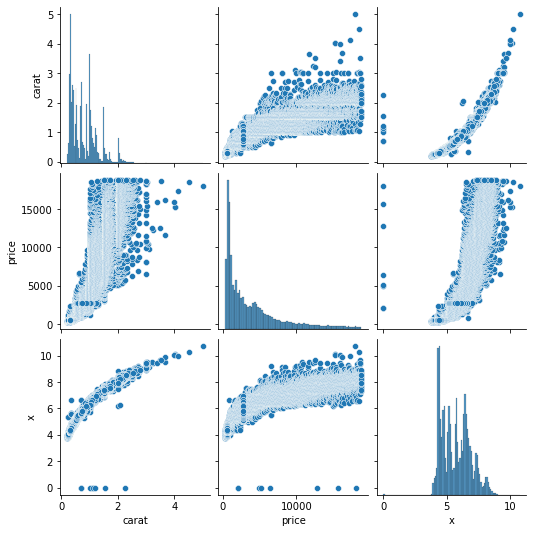

In [19]:
# pair-plot between the following attributes/columns: carat, price, x
import seaborn as sns
df_new = df[['carat', 'price', 'x']]
# Create the default pairplot
sns.pairplot(df_new)

In [20]:
#sns.pairplot(df)

Your best option to use regression to find outliers is to use robust regression.

Ordinary regression can be impacted by outliers in two ways:
First, an extreme outlier in the y-direction at x-values near x¯ can affect the fit in that area in the same way an outlier can affect a mean.
But incase of robust regression the outlier has a very large residual which makes easier to remove them.

In [21]:
from matplotlib import pyplot as plt
from sklearn.linear_model import (
    LinearRegression,
    HuberRegressor,
)
from sklearn.preprocessing import StandardScaler
model=HuberRegressor()
nor = StandardScaler()

In [22]:
dff=df[['y', 'price', 'z']]

In [23]:
x=list(df['z'])
y=list(df['price'])

In [24]:
dff.columns

Index(['y', 'price', 'z'], dtype='object')

In [25]:
a = np.array(x).reshape(-1,1)
x = nor.fit_transform(a)
b = np.array(y).reshape(1,-1)
y = nor.fit_transform(b)[0]

In [26]:
model.fit(x,y)

HuberRegressor()

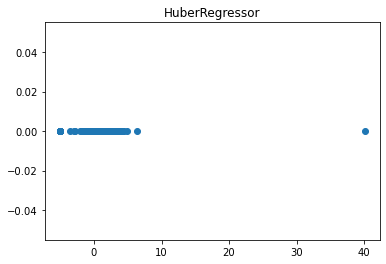

In [27]:
def plot_best_fit(x, y, model):
    # fut the model on all data
    model.fit(x, y)
    # plot the dataset
    plt.scatter(x, y)
    # show the plot
    plt.title(type(model).__name__)
    plt.show()
plot_best_fit(x, y, model)

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

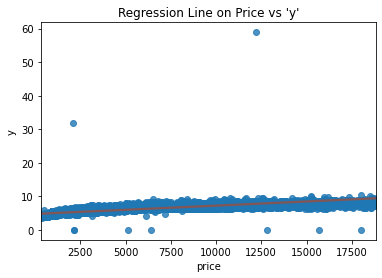

In [28]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True,line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

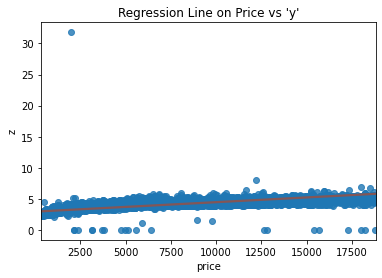

In [29]:
ax = sns.regplot(x="price", y="z", data=df, fit_reg=True,line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'")

"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated. We can also use Inter quantile range method to remove outliers.That would be a valid range to detect the outliers.

In [30]:
#We can clearly spot outliers in these attributes
df = df[(df["x"]<30)&(df["x"]>0)]
df = df[(df["y"]<30)&(df["y"]>0)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53914, 11)

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

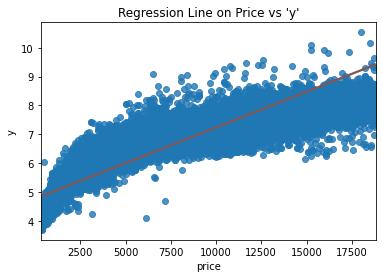

In [31]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True,line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'")

In [32]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


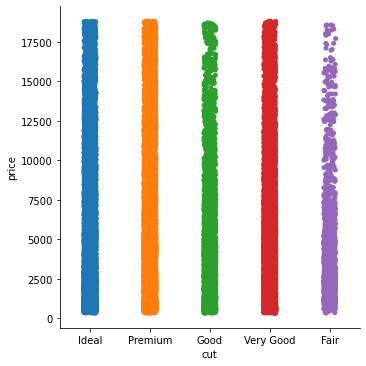

In [33]:
g = sns.catplot(x="cut",
                y="price",
                data=df, 
                )

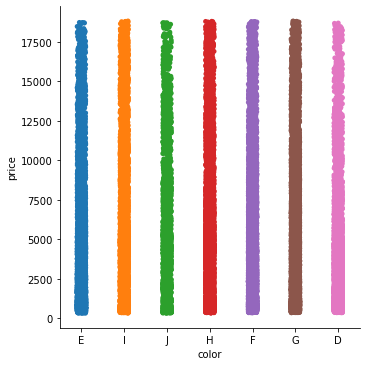

In [34]:
g = sns.catplot(x="color",
                y="price",
                data=df, 
                )

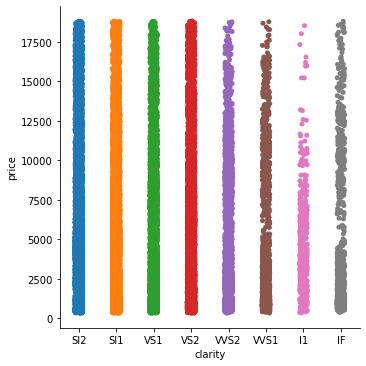

In [35]:
g = sns.catplot(x="clarity",
                y="price",
                data=df, 
                )

We have three categorical variables.encoding the data to get rid of object dtype for cut , color and clarity.

1. Label Encoding : Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data.
This may lead to the generation of priority issues in the training of data sets. 
A label with a high value may be considered to have high priority than a label having a lower value.
Label encoder is used when:
The number of categories is quite large as one-hot encoding can lead to high memory consumption. When the order does not matter in categorical feature.

In [36]:
# Make copy to avoid changing original data 
label_data1 = df.copy()
from sklearn import preprocessing
# Apply label encoder to each column with categorical data
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    label_data1[col] = label_encoder.fit_transform(label_data1[col])
label_data1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


2. Ordinal encoding:In ordinal encoding, each unique category value is assigned an integer value.

In [37]:
from sklearn.preprocessing import OrdinalEncoder
label_data2 = df.copy()
ord_encoder = OrdinalEncoder()
for col in object_cols:
    label_data2[col] = label_encoder.fit_transform(label_data2[col])
label_data2.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


One-Hot Encoding: It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.
One-Hot Encoding is the process of creating dummy variables.The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression.

one hot encoding is the most preferred when the features of the categorical variables to be converted are not ordinal. Also, one hot encoding works effectively when the number of categorical features present in the given dataset is very less. It is not recommended using One-hot encoding on features with high cardinality. This means if the categorical feature has a high number of unique values, it will create a new feature for every single unique value. Your dataset could then go from having 20 features to having 1000 features.

In [38]:
from sklearn.preprocessing import OneHotEncoder
label_data3 = df.copy()
onehotencoder = OneHotEncoder()
for col in object_cols:
    label_data3[col] = label_encoder.fit_transform(label_data3[col])
label_data3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [39]:
# form correlation matrix
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
            Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.378162 -0.035085 -0.100841 -0.307073 -0.406320   
carat        -0.378162  1.000000  0.028381  0.181720  0.921581  0.977777   
depth        -0.035085  0.028381  1.000000 -0.295778 -0.010628 -0.024914   
table        -0.100841  0.181720 -0.295778  1.000000  0.127305  0.196174   
price        -0.307073  0.921581 -0.010628  0.127305  1.000000  0.887213   
x            -0.406320  0.977777 -0.024914  0.196174  0.887213  1.000000   
y            -0.407232  0.976858 -0.028049  0.190021  0.888810  0.998657   
z            -0.409417  0.976991  0.096680  0.155818  0.882575  0.991619   

                   y         z  
Unnamed: 0 -0.407232 -0.409417  
carat       0.976858  0.976991  
depth      -0.028049  0.096680  
table       0.190021  0.155818  
price       0.888810  0.882575  
x           0.998657  0.991619  
y           1.000000  0.991276  
z           0.991276  1.00

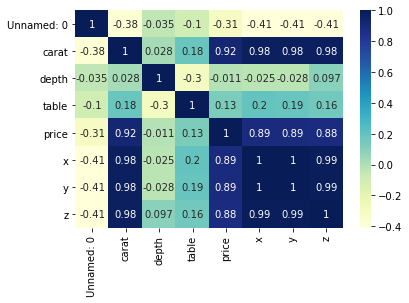

In [40]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables.
The value of correlation can take any value from -1 to 1.
Correlation between two random variables or bivariate data does not necessarily imply a causal relationship.
The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships

In [41]:
df=label_data2.drop(["Unnamed: 0"], axis=1)
A=df.drop(["price"], axis=1)
y=df['price']

In [42]:
A.shape

(53914, 9)

In [43]:
A.T.dot(A).shape

(9, 9)

 dimension of 𝐴TA = d+1 * d+1

In [44]:
y.shape

(53914,)

In [45]:
w_estimate = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T), y)

In [46]:
w_estimate.shape

(9,)

In [47]:
y_predict=A.dot(w_estimate)
y_predict

0         254.804759
1        -716.270997
2        -222.291001
3        -198.184524
4       -1213.636469
            ...     
53935    3361.330673
53936    3314.921190
53937    2838.326241
53938    3537.085513
53939    3901.679443
Length: 53914, dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
loss = mean_squared_error(A@w_estimate,y)
loss

1797563.8702039686

In [49]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

In [50]:
x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
scores = []
neighbors = np.arange(1, 10)

In [54]:
for k in neighbors:   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(x_train, y_train)
    score = cross_val_score(clf, x_train, y_train, cv = 10)
    scores.append(score.mean())

In [95]:
scores

[0.9644124755748047,
 0.9721400369320854,
 0.9737925897713865,
 0.974782088519374,
 0.9749665759639932,
 0.9747751081567468,
 0.9744569011195743,
 0.9741727629860767,
 0.9739641053640552]

In [96]:
mse = [1-x for x in scores]
mse

[0.035587524425195305,
 0.027859963067914606,
 0.026207410228613504,
 0.02521791148062602,
 0.025033424036006835,
 0.02522489184325316,
 0.02554309888042572,
 0.02582723701392331,
 0.0260358946359448]

In [56]:
optimal_k = neighbors[mse.index(min(mse))]
print("Optimal K: ", optimal_k)

Optimal K:  5


In [57]:
clf_optimal = KNeighborsRegressor(n_neighbors = optimal_k)
clf_optimal.fit(x_train, y_train)
y_pred = clf_optimal.predict(x_test)
acc = clf_optimal.score(x_test, y_test)
print("Accuracy: ", acc*100)
print("RMS Error: ", mean_squared_error(y_test, y_pred))

Accuracy:  88.65114929842586
RMS Error:  1844048.9050633695


In [58]:
# rmse_val = [] #to store rmse values for different k
# for K in range(20):
#     K = K+1
#     model = KNeighborsRegressor(n_neighbors = K)
#     model.fit(x_train, y_train)  #fit the model
#     pred=model.predict(x_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)
# print(f" Best value of k is {rmse_val.index(min(rmse_val))}")

## PART C CLASSIFICATION

In [59]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [61]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sarang-iitb/Car_Condition_evaluation_dataset/main/training_data.csv')
testdf= pd.read_csv('https://raw.githubusercontent.com/sarang-iitb/Car_Condition_evaluation_dataset/main/testing_data.csv')
print(df)

     Buying_Cost Maintainance_Cost Number_of_doors Number_of_Passenger  \
0          vhigh               med               2                   4   
1          vhigh               med           5more                   4   
2            med             vhigh           5more                   4   
3           high              high               3                   2   
4          vhigh             vhigh           5more                   4   
...          ...               ...             ...                 ...   
1549        high             vhigh               4                   2   
1550         med             vhigh               4                more   
1551       vhigh               low               4                   4   
1552         low             vhigh               3                more   
1553         low               med               3                   4   

     Luggage_Space Safety_Features How_is_the_deal  
0            small             low        Bad_deal  
1    

In [62]:
df.columns

Index(['Buying_Cost', 'Maintainance_Cost', 'Number_of_doors',
       'Number_of_Passenger', 'Luggage_Space', 'Safety_Features',
       'How_is_the_deal'],
      dtype='object')

In [63]:
df[df.columns]

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal
...,...,...,...,...,...,...,...
1549,high,vhigh,4,2,small,low,Bad_deal
1550,med,vhigh,4,more,med,high,Bad_deal
1551,vhigh,low,4,4,big,med,Bad_deal
1552,low,vhigh,3,more,small,high,Bad_deal


In [64]:
print(df["Buying_Cost"].unique())
print(df["Maintainance_Cost"].unique())
print(df["Number_of_doors"].unique())
print(df["Number_of_Passenger"].unique())
print(df["Luggage_Space"].unique())
print(df["Safety_Features"].unique())
print(df["How_is_the_deal"].unique())

['vhigh' 'med' 'high' 'low']
['med' 'vhigh' 'high' 'low']
['2' '5more' '3' '4']
['4' '2' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['Bad_deal' 'Nice_deal']


In [65]:
df["How_is_the_deal"].value_counts()

Bad_deal     1434
Nice_deal     120
Name: How_is_the_deal, dtype: int64

<AxesSubplot:>

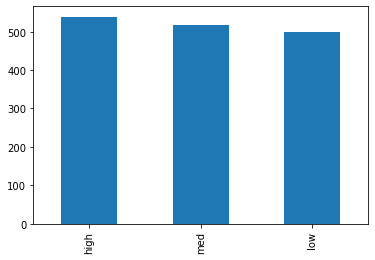

In [66]:
#Distribution of Independent Variables
df['Safety_Features'].value_counts().plot(kind = 'bar')

C:\Users\Srinidhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


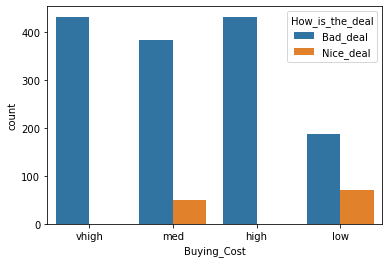

In [67]:
sns.countplot(df["Buying_Cost"], hue = df["How_is_the_deal"])
plt.show()

In [68]:
df

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features,How_is_the_deal
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal
...,...,...,...,...,...,...,...
1549,high,vhigh,4,2,small,low,Bad_deal
1550,med,vhigh,4,more,med,high,Bad_deal
1551,vhigh,low,4,4,big,med,Bad_deal
1552,low,vhigh,3,more,small,high,Bad_deal


In [69]:
df.isnull().sum()

Buying_Cost            0
Maintainance_Cost      0
Number_of_doors        0
Number_of_Passenger    0
Luggage_Space          0
Safety_Features        0
How_is_the_deal        0
dtype: int64

In [70]:
ord_df=df.copy()
Buy=['low','med','high','vhigh']
Maintainance=['low','med','high','vhigh']
doors=['2','3','4','5more']
Passenger=['2','4','more']
Luggage=['small','med','big']
Safety=['low','med','high']
deal=['Bad_deal','Nice_deal']
oe =OrdinalEncoder(categories=[Buy,Maintainance,doors,Passenger,Luggage,Safety,deal])
ord_df[["Buying_Cost","Maintainance_Cost","Number_of_doors","Number_of_Passenger","Luggage_Space","Safety_Features","How_is_the_deal"]]=oe.fit_transform(ord_df[["Buying_Cost","Maintainance_Cost","Number_of_doors","Number_of_Passenger","Luggage_Space","Safety_Features","How_is_the_deal"]])
pd.DataFrame(oe.fit_transform(df[["Buying_Cost","Maintainance_Cost","Number_of_doors","Number_of_Passenger","Luggage_Space","Safety_Features","How_is_the_deal"]]))

,0,1,2,3,4,5,6
0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3.0,1.0,3.0,1.0,0.0,0.0,0.0
2,1.0,3.0,3.0,1.0,0.0,0.0,0.0
3,2.0,2.0,1.0,0.0,1.0,1.0,0.0
4,3.0,3.0,3.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1549,2.0,3.0,2.0,0.0,0.0,0.0,0.0
1550,1.0,3.0,2.0,2.0,1.0,2.0,0.0
1551,3.0,0.0,2.0,1.0,2.0,1.0,0.0
1552,0.0,3.0,1.0,2.0,0.0,2.0,0.0


In [71]:
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Buying_Cost          1554 non-null   float64
 1   Maintainance_Cost    1554 non-null   float64
 2   Number_of_doors      1554 non-null   float64
 3   Number_of_Passenger  1554 non-null   float64
 4   Luggage_Space        1554 non-null   float64
 5   Safety_Features      1554 non-null   float64
 6   How_is_the_deal      1554 non-null   float64
dtypes: float64(7)
memory usage: 85.1 KB


In [72]:
X = ord_df.drop(['How_is_the_deal'], axis = 1)
y = df['How_is_the_deal']

In [73]:
X

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,3.0,1.0,0.0,1.0,0.0,0.0
1,3.0,1.0,3.0,1.0,0.0,0.0
2,1.0,3.0,3.0,1.0,0.0,0.0
3,2.0,2.0,1.0,0.0,1.0,1.0
4,3.0,3.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...
1549,2.0,3.0,2.0,0.0,0.0,0.0
1550,1.0,3.0,2.0,2.0,1.0,2.0
1551,3.0,0.0,2.0,1.0,2.0,1.0
1552,0.0,3.0,1.0,2.0,0.0,2.0


In [74]:
y

0        Bad_deal
1        Bad_deal
2        Bad_deal
3        Bad_deal
4        Bad_deal
          ...    
1549     Bad_deal
1550     Bad_deal
1551     Bad_deal
1552     Bad_deal
1553    Nice_deal
Name: How_is_the_deal, Length: 1554, dtype: object

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [76]:
df["How_is_the_deal"].value_counts()

Bad_deal     1434
Nice_deal     120
Name: How_is_the_deal, dtype: int64

In [101]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np
# import matplotlib.pyplot as plt

# # function for fitting trees of various depths on the training data using cross-validation
# def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
#     cv_scores_list = []
#     cv_scores_std = []
#     cv_scores_mean = []
#     accuracy_scores = []
#     for depth in tree_depths:
#         tree_model = DecisionTreeClassifier(max_depth=depth)
#         cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
#         cv_scores_list.append(cv_scores)
#         cv_scores_mean.append(cv_scores.mean())
#         cv_scores_std.append(cv_scores.std())
#         accuracy_scores.append(tree_model.fit(X, y).score(X, y))
#     cv_scores_mean = np.array(cv_scores_mean)
#     cv_scores_std = np.array(cv_scores_std)
#     accuracy_scores = np.array(accuracy_scores)
#     return cv_scores_mean, cv_scores_std, accuracy_scores
  
# # function for plotting cross-validation results
# def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
#     fig, ax = plt.subplots(1,1, figsize=(15,5))
#     ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
#     ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
#     ylim = plt.ylim()
#     ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
#     ax.set_title(title, fontsize=16)
#     ax.set_xlabel('Tree depth', fontsize=14)
#     ax.set_ylabel('Accuracy', fontsize=14)
#     ax.set_ylim(ylim)
#     ax.set_xticks(depths)
#     ax.legend()

# # fitting trees of depth 1 to 24
# sm_tree_depths = range(1,25)
# sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# # plotting accuracy
# plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
#                                'Accuracy per decision tree depth on training data')


    
 

In [102]:
# idx_max = sm_cv_scores_mean.argmax()
# sm_best_tree_depth = sm_tree_depths[idx_max]
# sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
# sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
# print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
#       sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


In [77]:
DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [78]:
y_pred = DT_classifier.predict(X_test)

In [79]:
y_pred

array(['Bad_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Ba

In [80]:
from sklearn.metrics import accuracy_score
print("Model Accuracy score with criterion gini index {0:0.4f}"
      .format(accuracy_score(y_pred, y_test)))

Model Accuracy score with criterion gini index 0.9443


In [81]:
confusion_matrix(y_test, y_pred)

array([[421,   0],
       [ 26,  20]], dtype=int64)

In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bad_deal       0.94      1.00      0.97       421
   Nice_deal       1.00      0.43      0.61        46

    accuracy                           0.94       467
   macro avg       0.97      0.72      0.79       467
weighted avg       0.95      0.94      0.93       467



[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.127\nsamples = 1087\nvalue = [1013, 74]'),
 Text(0.2, 0.625, 'X[1] <= 1.5\ngini = 0.383\nsamples = 174\nvalue = [129, 45]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.3, 0.375, 'X[5] <= 1.5\ngini = 0.098\nsamples = 136\nvalue = [129, 7]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.4, 0.125, 'gini = 0.254\nsamples = 47\nvalue = [40, 7]'),
 Text(0.8, 0.625, 'X[0] <= 1.5\ngini = 0.062\nsamples = 913\nvalue = [884, 29]'),
 Text(0.7, 0.375, 'X[1] <= 0.5\ngini = 0.173\nsamples = 304\nvalue = [275, 29]'),
 Text(0.6, 0.125, 'gini = 0.418\nsamples = 74\nvalue = [52, 22]'),
 Text(0.8, 0.125, 'gini = 0.059\nsamples = 230\nvalue = [223, 7]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 609\nvalue = [609, 0]')]

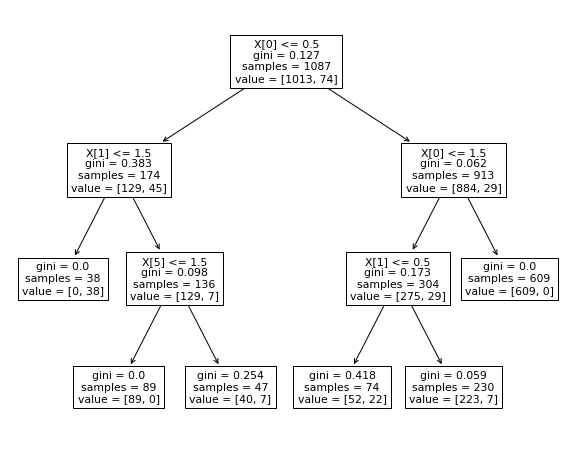

In [83]:
plt.figure(figsize=(10, 8))
from sklearn import tree
tree.plot_tree(DT_classifier.fit(X_train, y_train))

In [84]:
# condition = df['How_is_the_deal'] == "Nice_deal"
# true_index = condition[condition == True].index
# sub1 = df[condition].sample(n = 120)
# condition = df['How_is_the_deal'] == "Bad_deal"
# true_index = condition[condition == True].index
# sub2 = df[condition].sample(n = 120)
# data=pd.concat([sub1,sub2])
# data.shape

In [85]:
testdf

,Deal_num,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,low,low,5more,more,big,high
1,1,low,low,2,2,small,high
2,2,low,med,5more,4,med,low
3,3,low,low,4,2,big,low
4,4,low,low,4,2,med,high
...,...,...,...,...,...,...,...
169,169,low,med,4,2,small,low
170,170,low,med,5more,2,small,med
171,171,low,med,5more,more,big,low
172,172,low,high,5more,4,small,low


In [86]:
testdf=testdf.drop(['Deal_num'], axis=1)

In [87]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Buying_Cost          174 non-null    object
 1   Maintainance_Cost    174 non-null    object
 2   Number_of_doors      174 non-null    object
 3   Number_of_Passenger  174 non-null    object
 4   Luggage_Space        174 non-null    object
 5   Safety_Features      174 non-null    object
dtypes: object(6)
memory usage: 8.3+ KB


In [88]:
testord_df=testdf.copy()
testord_df

,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,low,low,5more,more,big,high
1,low,low,2,2,small,high
2,low,med,5more,4,med,low
3,low,low,4,2,big,low
4,low,low,4,2,med,high
...,...,...,...,...,...,...
169,low,med,4,2,small,low
170,low,med,5more,2,small,med
171,low,med,5more,more,big,low
172,low,high,5more,4,small,low


In [89]:
print(testdf["Buying_Cost"].unique())
print(testdf["Maintainance_Cost"].unique())
print(testdf["Number_of_doors"].unique())
print(testdf["Number_of_Passenger"].unique())
print(testdf["Luggage_Space"].unique())
print(testdf["Safety_Features"].unique())

['low']
['low' 'med' 'high']
['5more' '2' '4' '3']
['more' '2' '4']
['big' 'small' 'med']
['high' 'low' 'med']


In [90]:
ordinal_test=testdf.copy()
Buy=['low'] #increasing order of importance
Maintainance=['low','med','high']
doors=['2','3','4','5more']
Passenger=['2','4','more']
Luggage=['small','med','big']
Safety=['low','med','high']
ordi = OrdinalEncoder(categories=[Buy,Maintainance,doors,Passenger,Luggage,Safety])
ordinal_test[["Buying_Cost","Maintainance_Cost","Number_of_doors","Number_of_Passenger","Luggage_Space","Safety_Features"]]=ordi.fit_transform(ordinal_test[["Buying_Cost","Maintainance_Cost","Number_of_doors","Number_of_Passenger","Luggage_Space","Safety_Features"]])
pd.DataFrame(ordi.fit_transform(testdf[["Buying_Cost","Maintainance_Cost","Number_of_doors","Number_of_Passenger","Luggage_Space","Safety_Features"]]))

,0,1,2,3,4,5
0,0.0,0.0,3.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1.0,3.0,1.0,1.0,0.0
3,0.0,0.0,2.0,0.0,2.0,0.0
4,0.0,0.0,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...
169,0.0,1.0,2.0,0.0,0.0,0.0
170,0.0,1.0,3.0,0.0,0.0,1.0
171,0.0,1.0,3.0,2.0,2.0,0.0
172,0.0,2.0,3.0,1.0,0.0,0.0


In [91]:
ordinal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Buying_Cost          174 non-null    float64
 1   Maintainance_Cost    174 non-null    float64
 2   Number_of_doors      174 non-null    float64
 3   Number_of_Passenger  174 non-null    float64
 4   Luggage_Space        174 non-null    float64
 5   Safety_Features      174 non-null    float64
dtypes: float64(6)
memory usage: 8.3 KB


In [92]:
y_pred = DT_classifier.predict(ordinal_test)

In [93]:
y_pred

array(['Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal', 'Nice_deal',
       'Bad_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Bad_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal',
       'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal', 'Nice_deal'

In [94]:
print('score',DT_classifier.score(X_train,y_train))

score 0.9668813247470102
